In [1]:
setwd("~/Documents/DE/Shed/")
require(ggplot2)
require(nlme)
require(tidyr)
require(MASS)
require(dplyr)
require(EnvStats)
require(lme4)

Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: nlme
Loading required package: tidyr
Loading required package: MASS
Loading required package: dplyr

Attaching package: ‘dplyr’

The following object is masked from ‘package:MASS’:

    select

The following object is masked from ‘package:nlme’:

    collapse

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: EnvStats

Attaching package: ‘EnvStats’

The following object is masked from ‘package:MASS’:

    boxcox

The following objects are masked from ‘package:stats’:

    predict, predict.lm

The following object is masked from ‘package:base’:

    print.default

Loading required package: lme4
Loading required package: Matrix

Attaching package: ‘

Other things to look at: 
Can we compare oysters that died to oysters that survived. 
when an oyster died, you know how many cells they released in the last 6 hours. 

In [2]:
cells=read.csv("Cells_found_actualhigh.csv")
oysters=read.csv("Oyster_data.csv")

In [3]:
(oysters)

ID,Salinity,TISSUE,MORTALITY.DATE,Gape,Mortality,Gape_day,Mortality_day,Four_trials,Survived
26Y,HIGH,4,,NA,NA,NA,NA,Yes,Yes
27Y,HIGH,NA,20-Oct,NA,21-Oct,NA,11,No,No
28Y,HIGH,2,,NA,NA,NA,NA,No,Yes
29Y,HIGH,NA,11-Nov,NA,12-Nov,NA,NA,No,No
30Y,HIGH,3,,NA,NA,NA,NA,Yes,Yes
32Y,HIGH,5,,NA,NA,NA,NA,Yes,Yes
33Y,HIGH,2,,NA,NA,NA,NA,Yes,Yes
34Y,HIGH,4,7-Nov,7-Nov,8-Nov,28,29,No,No
35Y,HIGH,NA,24-Oct,NA,21-Oct,NA,11,No,No
36Y,HIGH,NA,24-Oct,NA,25-Oct,NA,15,No,No


In [4]:
#reformat dataframe, separate day and treatment
cells=pivot_longer(cells, Ambient_5:Heat_32, names_to=c("Treatment","Day"), names_sep="_", values_to="number")

In [5]:
head(cells)

ID,Treatment,Day,number
26Y,Ambient,5,NA
26Y,Ambient,7,NA
26Y,Ambient,10,4
26Y,Ambient,14,5
26Y,Heat,21,NA
26Y,Heat,23,NA


In [6]:
#combine 0.5 and 1 and 4 and 5 
oysters$Tissue_sim=ifelse(oysters$TISSUE==0.5, 1.0, ifelse(oysters$TISSUE==5, 4.0, oysters$TISSUE))

In [7]:
all=merge(cells,oysters, by="ID")

In [58]:
head(all)

ID,Treatment,Day,number,Salinity,TISSUE,MORTALITY.DATE,Gape,Mortality,Gape_day,Mortality_day,Four_trials,Survived,Tissue_sim,Trial
10W,Ambient,5,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,one
10W,Ambient,7,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,two
10W,Ambient,10,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,one
10W,Ambient,14,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,two
10W,Heat,21,27,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,one
10W,Heat,23,0,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,two


In [9]:
all$Trial=ifelse(all$Day=="5"|all$Day=="10"|all$Day== "21"| all$Day=="28", "one", "two")

## Influence of salinity on mackin score of tissue (for all oysters with mackin score) 

In [10]:
#combine 0.5 and 1 and 4 and 5 
all$Tissue_sim=ifelse(all$TISSUE==0.5, 1.0, ifelse(all$TISSUE==5, 4.0, all$TISSUE))

In [11]:
#remove oysters without a mackin score
mackin=all[!is.na(all$TISSUE),]

In [12]:
head(mackin)

ID,Treatment,Day,number,Salinity,TISSUE,MORTALITY.DATE,Gape,Mortality,Gape_day,Mortality_day,Four_trials,Survived,Tissue_sim,Trial
10W,Ambient,5,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,one
10W,Ambient,7,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,two
10W,Ambient,10,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,one
10W,Ambient,14,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,two
10W,Heat,21,27,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,one
10W,Heat,23,0,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,two


In [13]:
#how many individuals do we have?
length(unique(all$ID))
length(unique(mackin$ID))

[1] 71

[1] 53

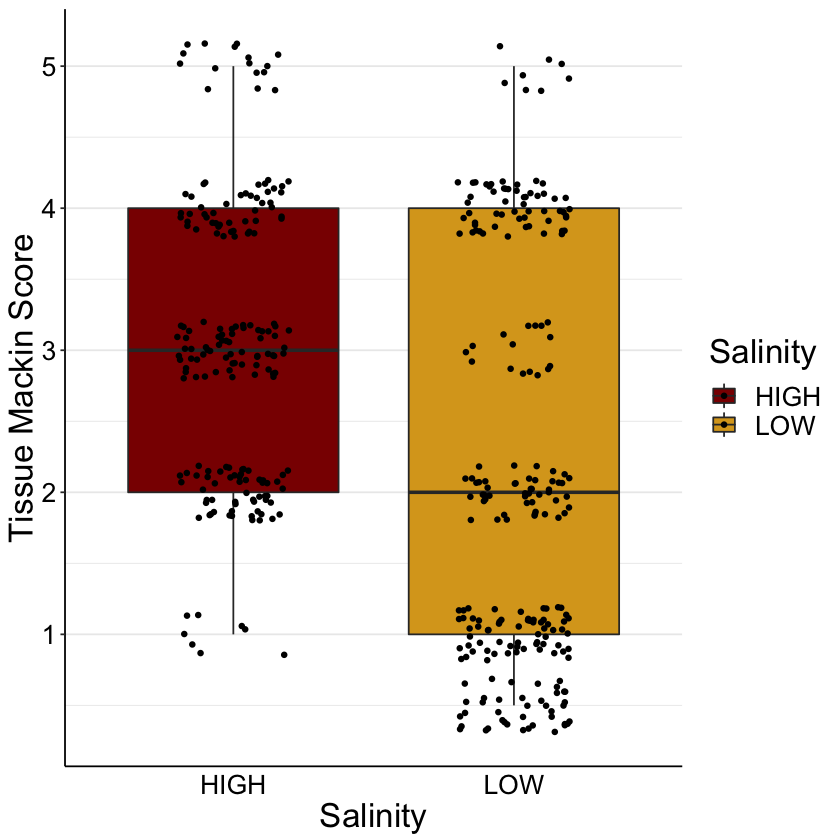

In [14]:
#plot a boxplot
ggplot(mackin, aes(x = Salinity, y = TISSUE, fill=Salinity)) +
scale_fill_manual(values=c("darkred", "goldenrod"))+
        geom_boxplot()+
geom_jitter(shape=16, position=position_jitter(0.2))+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("Tissue Mackin Score")

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

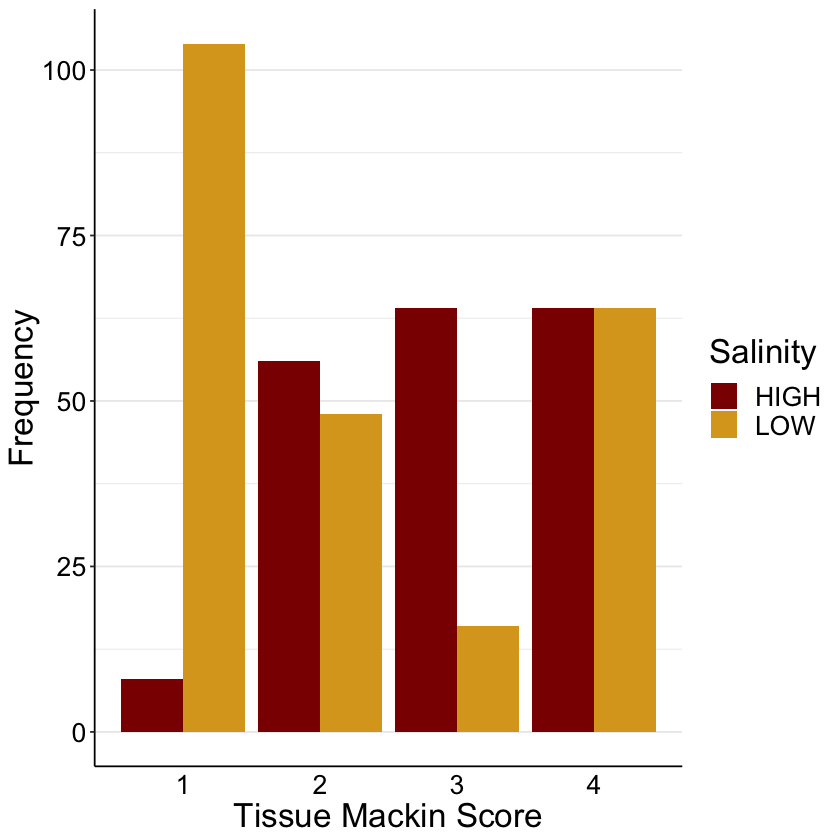

In [101]:
#plot a histogram
ggplot(mackin, aes(x=Tissue_sim, fill=Salinity)) +
  geom_histogram(position="dodge", stat="count")+
scale_fill_manual(values=c("darkred", "goldenrod"))+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("Frequency")+xlab("Tissue Mackin Score")

two anovas within high and low look at sorry effect of mackin score on and see if the slopes are different 

In [16]:
#make score a factor
mackin$TISSUE=as.factor(as.character(mackin$TISSUE))

logistic regression with mackin score as ordinal response. 

In [17]:
head(mackin)

ID,Treatment,Day,number,Salinity,TISSUE,MORTALITY.DATE,Gape,Mortality,Gape_day,Mortality_day,Four_trials,Survived,Tissue_sim,Trial
10W,Ambient,5,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,one
10W,Ambient,7,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,two
10W,Ambient,10,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,one
10W,Ambient,14,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,two
10W,Heat,21,27,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,one
10W,Heat,23,0,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,two


In [18]:
#run logistic regression
m = polr(TISSUE ~ Salinity, data = mackin, Hess=TRUE)

## view a summary of the model
summary(m)
(ctable = coef(summary(m)))

p = pnorm(abs(ctable[, "t value"]), lower.tail = FALSE) * 2
(ctable =cbind(ctable, "p value" = p))

Call:
polr(formula = TISSUE ~ Salinity, data = mackin, Hess = TRUE)

Coefficients:
             Value Std. Error t value
SalinityLOW -1.307     0.1835  -7.122

Intercepts:
      Value    Std. Error t value 
0.5|1  -3.1152   0.2112   -14.7476
1|2    -1.7597   0.1572   -11.1930
2|3    -0.5478   0.1291    -4.2428
3|4     0.2947   0.1304     2.2597
4|5     2.2884   0.2211    10.3491

Residual Deviance: 1380.291 
AIC: 1392.291 

,Value,Std. Error,t value
SalinityLOW,-1.3070898,0.1835293,-7.121968
0.5|1,-3.1152044,0.2112341,-14.747637
1|2,-1.7596643,0.1572109,-11.193019
2|3,-0.5478055,0.1291129,-4.242841
3|4,0.2946677,0.1303997,2.259726
4|5,2.2883573,0.2211162,10.349117


,Value,Std. Error,t value,p value
SalinityLOW,-1.3070898,0.1835293,-7.121968,1.063966e-12
0.5|1,-3.1152044,0.2112341,-14.747637,3.186279e-49
1|2,-1.7596643,0.1572109,-11.193019,4.411536e-29
2|3,-0.5478055,0.1291129,-4.242841,2.207080e-05
3|4,0.2946677,0.1303997,2.259726,2.383824e-02
4|5,2.2883573,0.2211162,10.349117,4.223613e-25


## Influence of heat on number of cells released. broken up by mackin score of tissue. Survivors only

In [19]:
#take out oysters that survived to end of experiment
survivors=all[all$Survived=="Yes",]


Warning message:
“Removed 231 rows containing missing values (geom_point).”

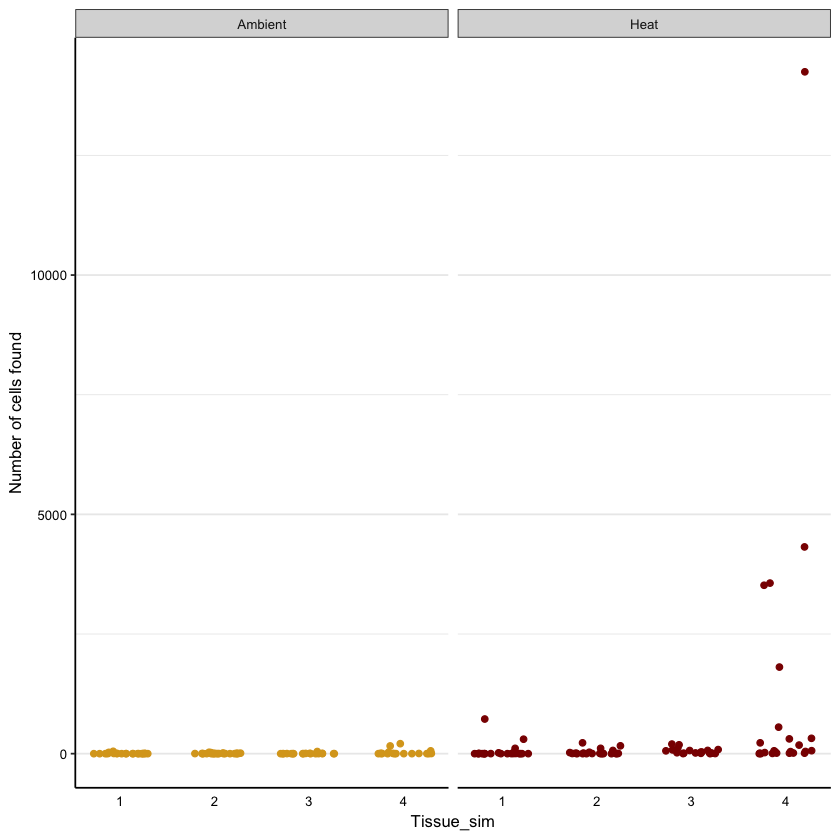

In [20]:
#plot mackin score vs number released
ggplot(survivors, aes(x = Tissue_sim, y = number, col=Treatment, group=ID)) +
scale_color_manual(values=c("goldenrod", "darkred"))+
       geom_jitter(position=position_jitter(0.3))+
#geom_line()+
 facet_grid(. ~ Treatment)+
theme_bw()+
 
theme(legend.position="none", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=10))+
ylab("Number of cells found")

In [21]:
head(survivors)

ID,Treatment,Day,number,Salinity,TISSUE,MORTALITY.DATE,Gape,Mortality,Gape_day,Mortality_day,Four_trials,Survived,Tissue_sim,Trial
10W,Ambient,5,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,one
10W,Ambient,7,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,two
10W,Ambient,10,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,one
10W,Ambient,14,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,two
10W,Heat,21,27,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,one
10W,Heat,23,0,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,two


In [22]:
#take the mean for each individual across two trials 
means=as.data.frame(aggregate(number~ID+Treatment, data=survivors, FUN=mean))

In [23]:
#reorganize dataframe so that ambient and heat are in separate columns
means=pivot_wider(means, id_cols=ID, names_from=Treatment, values_from=number)

In [24]:
#remove any nas?
means=na.omit(means)

In [25]:
#how many individuals?
length(unique(means$ID))

[1] 47

In [26]:
#calculate difference between ambient and heated means
means$diff=means$Heat-means$Ambient

In [27]:
#get salinity info out of id code
means$Salinity=ifelse(substr(means$ID,3,3)=="W", "Low", "High")

In [28]:
#combine the differences and the oyster data
diffsm=merge(means, oysters, by="ID")

In [29]:
head(diffsm)

ID,Ambient,Heat,diff,Salinity.x,Salinity.y,TISSUE,MORTALITY.DATE,Gape,Mortality,Gape_day,Mortality_day,Four_trials,Survived,Tissue_sim
12W,0.0,151.0,151.0,Low,LOW,1.0,,NA,NA,NA,NA,No,Yes,1
13W,0.5,10.0,9.5,Low,LOW,0.5,,NA,NA,NA,NA,Yes,Yes,1
14W,1.0,67.0,66.0,Low,LOW,2.0,,NA,NA,NA,NA,No,Yes,2
16W,1.5,6.0,4.5,Low,LOW,4.0,,NA,NA,NA,NA,Yes,Yes,4
1W,2.5,1.5,-1.0,High,LOW,2.0,,NA,NA,NA,NA,Yes,Yes,2
20W,24.5,0.0,-24.5,Low,LOW,1.0,,NA,NA,NA,NA,Yes,Yes,1


In [30]:
#transform for plotting
diffsm$logdiff=ifelse(diffsm$diff>0, log10(diffsm$diff+1), ifelse(diffsm$diff==0, 0, -log10(abs(diffsm$diff)+1)))

Warning message in ifelse(diffsm$diff > 0, log10(diffsm$diff + 1), ifelse(diffsm$diff == :
“NaNs produced”

Warning message:
“Removed 3 rows containing missing values (geom_bar).”

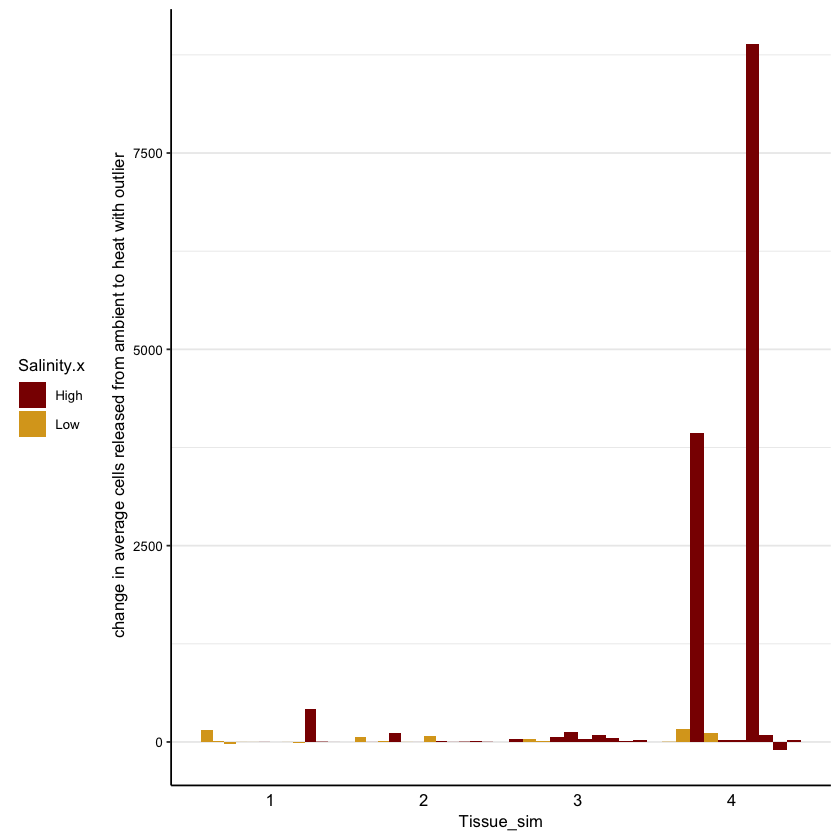

In [31]:
#plot non transformed change
ggplot((diffsm), aes(x = Tissue_sim, y = diff, group=ID, fill=Salinity.x)) +
scale_fill_manual(values=c("darkred", "goldenrod"))+
geom_bar(stat="identity", position="dodge")+
theme_bw()+
 theme(legend.position="left", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
       axis.text.x=element_text(size=10), 
          text = element_text(size=10))+
#ylim(-5,5)+
ylab(" change in average cells released from ambient to heat with outlier")

Warning message:
“Removed 3 rows containing missing values (geom_bar).”

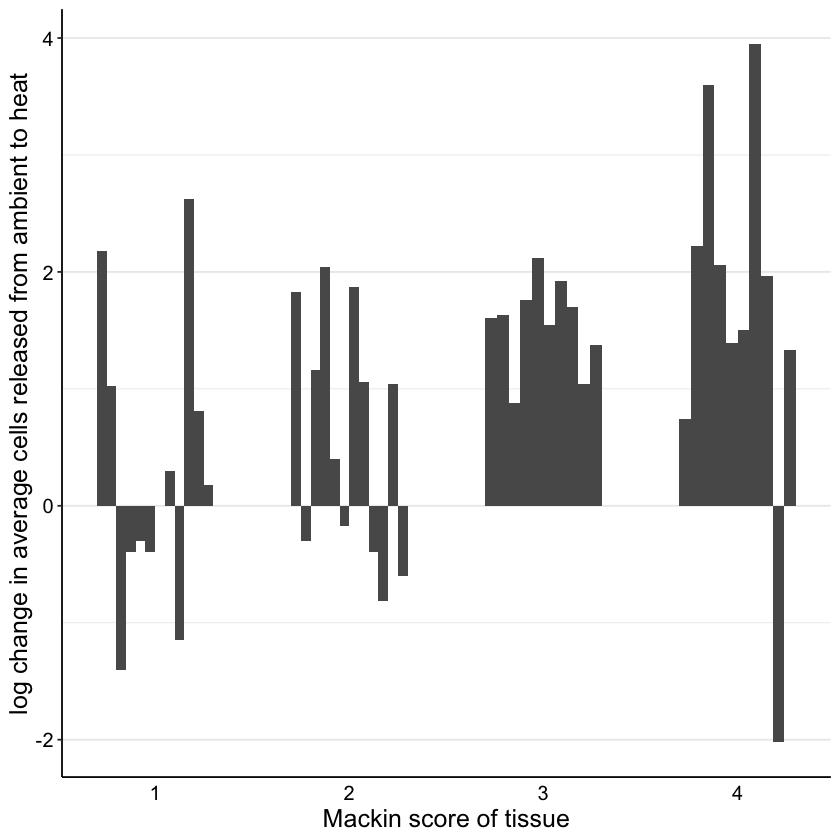

In [32]:
#plot log change
ggplot(diffsm, aes(x = Tissue_sim, y = logdiff, group=ID)) +
#scale_fill_manual(values=c("darkred", "goldenrod"))+
geom_bar(stat="identity", position="dodge", width=0.6)+
theme_bw()+
 theme(legend.position="left", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
         text = element_text(size=15))+
#ylim(-15,10000)+
ylab("log change in average cells released from ambient to heat") +
xlab("Mackin score of tissue")

one sample t test with null as 0. 
run a separate t test, alternatively do a 95% ci and see if they overlap 
plot difference value as function of score. 

Look at relationship between intensity and shedding. if there is a relationship then need to deal with it. maybe an ancova? have to do it separately for each one unless its the same relationship. 

difference value is your dependent variable. Can you build a model that is looking at salinity by intensity? 
y axis is difference between temps. x axis is intensity, graph the two salinity

also could just look at differeence for high and low salniigy
if theres no relationship with intensity, fine to just compare high and low salinity. 

In [33]:
survivors_tissue=survivors[!is.na(survivors$Tissue_sim),]

In [37]:
#look at what the min is so you can transform with everythign positive
min(na.omit(diffsm$diff))

[1] -104

In [38]:
##logtransform for stats
diffsm$pos=(diffsm$diff+105)


In [35]:
#try a boxcox transformation
boxcox(diffsm$pos, lambda =  c(-2, 2) , 
    optimize = TRUE, objective.name = "Shapiro-Wilk", 
    eps = .Machine$double.eps, include.x = TRUE)


Results of Box-Cox Transformation
---------------------------------

Objective Name:                  Shapiro-Wilk

Data:                            diffsm$pos

Sample Size:                     47

Bounds for Optimization:         lower = -2
                                 upper =  2

Optimal Value:                   lambda = 0.03327076

Value of Objective:              Shapiro-Wilk = 0.6149918


In [82]:
diffsm$pos

NULL

In [39]:
diffsm$trans=boxcoxTransform(diffsm$pos, lambda= 0.03327076)

In [40]:
boxcoxTransform(diffsm$pos, lambda= 0.03327076)

[1]  6.089662  5.134877  5.607636  5.082638  5.022441  4.724778  5.175105
 [8]  6.153751  9.565293  5.894193  5.016817  5.270198  5.404305  5.691448
[15]  5.336934  6.193276  5.877584  5.424618  5.022441 10.632731  5.772950
[22]  5.050176  5.028039  5.016817  5.033612  0.000000  5.658606  5.044679
[29]  5.242444  5.103805  5.543539  4.879643  5.994506  6.956745  5.366868
[36]  5.145060  5.093268  5.016817  5.717105  5.483605  5.315093  4.970855
[43]  5.139979  5.139979  5.261017  5.039158  4.999786

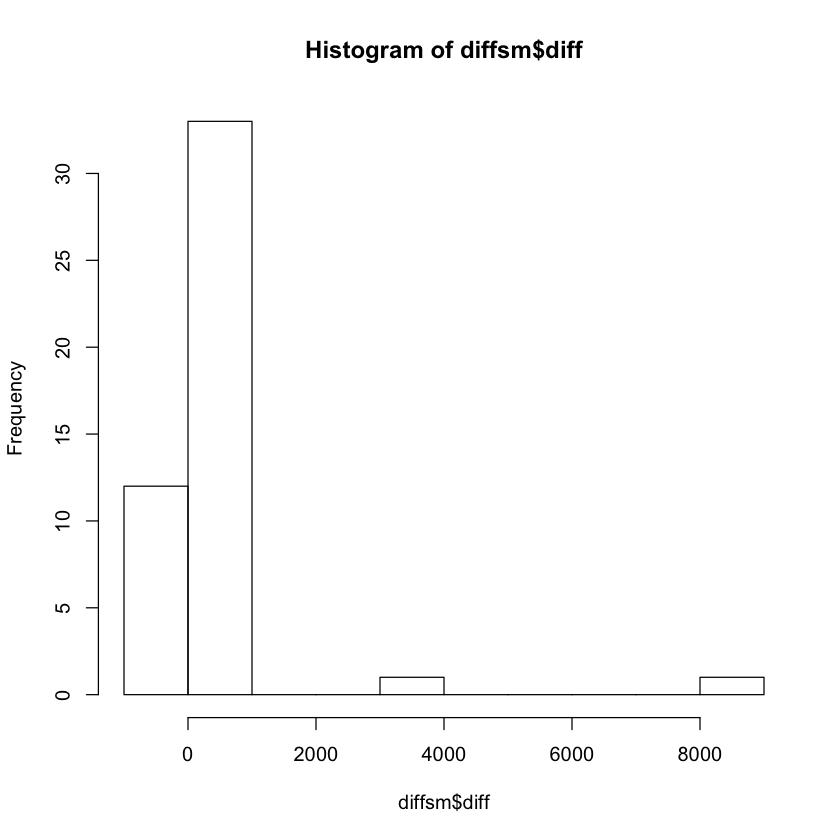

In [41]:
hist(diffsm$diff)

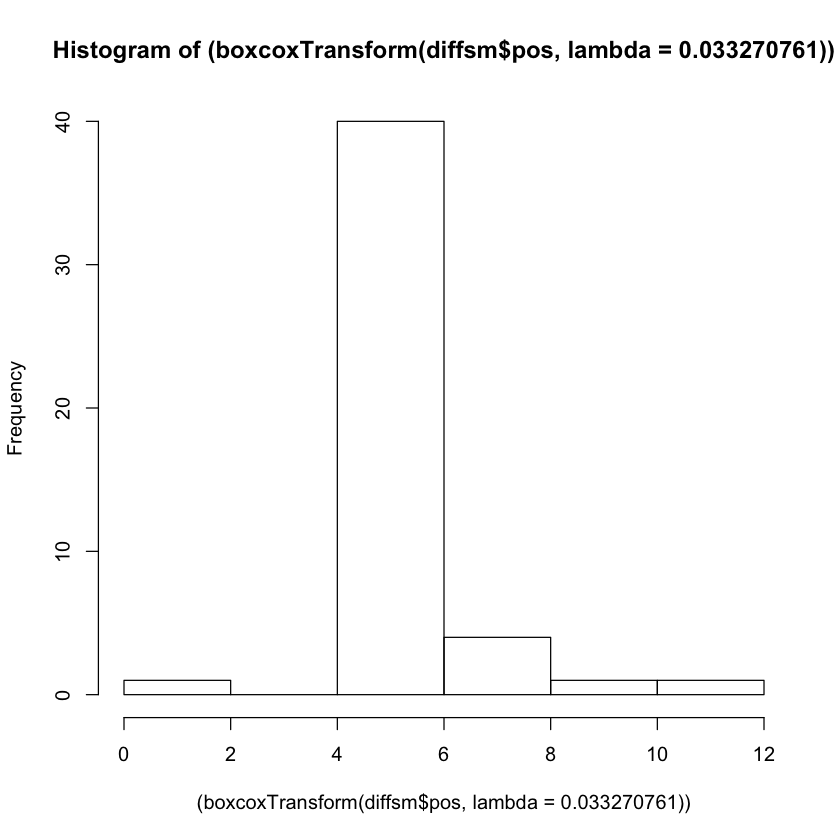

In [42]:
hist((boxcoxTransform(diffsm$pos, lambda=0.033270761)))

In [43]:
boxcoxTransform(105, lambda= 0.03327076)

[1] 5.033612

In [44]:
t.test(boxcoxTransform(diffsm$pos, lambda= 0.03327076), mu=5.03361156327713)


	One Sample t-test

data:  boxcoxTransform(diffsm$pos, lambda = 0.03327076)
t = 2.1548, df = 46, p-value = 0.03645
alternative hypothesis: true mean is not equal to 5.033612
95 percent confidence interval:
 5.061289 5.846578
sample estimates:
mean of x 
 5.453934 


In [45]:
anovasal=lm(data=(diffsm), trans~Salinity.x*Tissue_sim)
summary(anovasal)


Call:
lm(formula = trans ~ Salinity.x * Tissue_sim, data = (diffsm))

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8098 -0.3540 -0.1216  0.0385  4.8229 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)               4.94018    0.75872   6.511 9.04e-08 ***
Salinity.xLow             0.01028    1.02551   0.010    0.992    
Tissue_sim                0.21741    0.26580   0.818    0.418    
Salinity.xLow:Tissue_sim -0.04272    0.40070  -0.107    0.916    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.406 on 40 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.03063,	Adjusted R-squared:  -0.04207 
F-statistic: 0.4213 on 3 and 40 DF,  p-value: 0.7387


In [ ]:
unique()

difference value between ambient and heat, expect to be zero if theres no effect. need to account for oyster ID. 

Notes from talking to Lisa:
Is there info on metabolic rate of ectotherm/oysters and temperature Growth rate or filtration rate? 
Filtration and release rates as a function of temperature, plus pathogen infection probability. 
ARe pathogens growing faster, or are they infecting more efficiently, or are they 
Also focusing more on the host makes it easier to translate to alternate hosts
Encorporate salinity just into the pathogen dynamics? 
Can't just be like temperature only affects oysters and salinity only affects the pathogen. 
Look at temperature effects on perkinsus marinus. 

See if there's a metabolic response to salinity on the oyster... Need to 

Are there papers about Perkinsus and temperature? 

I decide if there are more experiments to tease apart hypotheses. 

What is the tempareture range 


## Things to do next:


Influence of days before death on #cells released (for last day) 

Compare last value of ones that survived to ones that died. also compare to gapers?



In [46]:
head(all)

ID,Treatment,Day,number,Salinity,TISSUE,MORTALITY.DATE,Gape,Mortality,Gape_day,Mortality_day,Four_trials,Survived,Tissue_sim,Trial
10W,Ambient,5,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,one
10W,Ambient,7,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,two
10W,Ambient,10,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,one
10W,Ambient,14,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,two
10W,Heat,21,27,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,one
10W,Heat,23,0,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,two


In [47]:
dead=all[!is.na(all$Mortality_day),]

In [48]:
length(unique(dead$ID))

[1] 22

In [49]:
dead$Day=as.numeric(as.character(dead$Day))
dead$Mortality_day=as.numeric(as.character(dead$Mortality_day))

In [50]:
dead$time_death=dead$Mortality_day-dead$Day

In [51]:
dead$dummy=1

In [52]:
dead$percent=dead$number

In [53]:
total=aggregate(number~ID, data=dead, FUN=sum)

In [54]:
dead=merge(dead, total, by="ID")

In [55]:
dead$percent=(dead$number.x/dead$number.y)*100

In [56]:
head(dead)

ID,Treatment,Day,number.x,Salinity,TISSUE,MORTALITY.DATE,Gape,Mortality,Gape_day,Mortality_day,Four_trials,Survived,Tissue_sim,Trial,time_death,dummy,percent,number.y
11W,Ambient,5,NA,LOW,1,7-Nov,7-Nov,8-Nov,28,29,No,No,1,one,24,1,NA,14
11W,Ambient,7,NA,LOW,1,7-Nov,7-Nov,8-Nov,28,29,No,No,1,two,22,1,NA,14
11W,Ambient,10,0,LOW,1,7-Nov,7-Nov,8-Nov,28,29,No,No,1,one,19,1,0.000000,14
11W,Ambient,14,1,LOW,1,7-Nov,7-Nov,8-Nov,28,29,No,No,1,two,15,1,7.142857,14
11W,Heat,21,NA,LOW,1,7-Nov,7-Nov,8-Nov,28,29,No,No,1,one,8,1,NA,14
11W,Heat,23,NA,LOW,1,7-Nov,7-Nov,8-Nov,28,29,No,No,1,two,6,1,NA,14


Warning message:
“Removed 126 rows containing missing values (geom_point).”

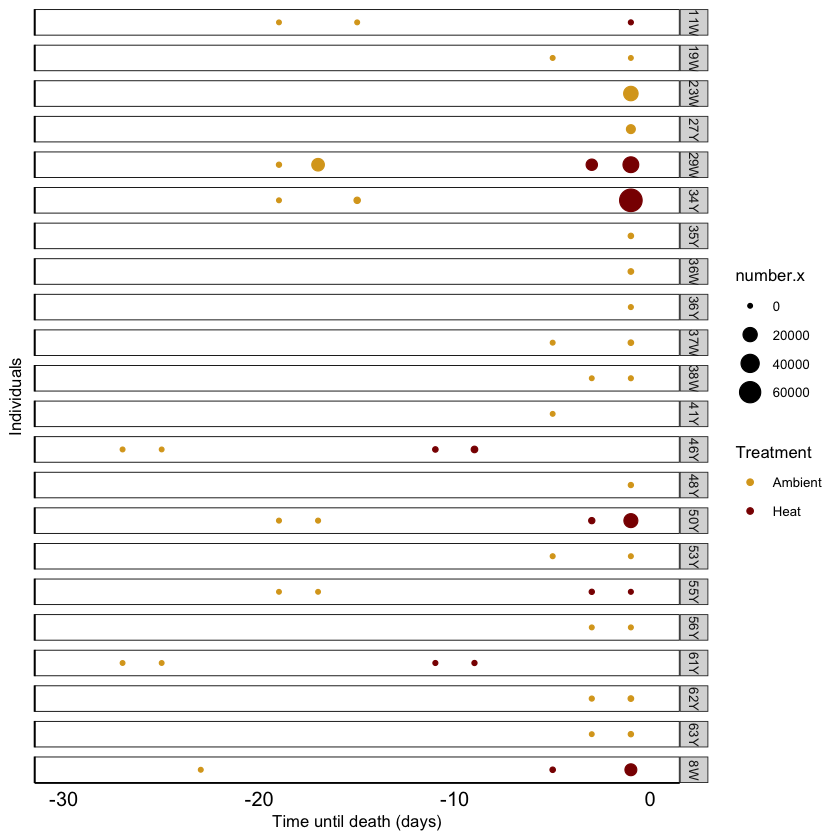

In [55]:
#plot mackin score vs number released
ggplot(dead, aes(x = -time_death, y=dummy, size = number.x, col=Treatment, group=ID)) +
scale_color_manual(values=c("goldenrod", "darkred"))+
      geom_point()+
#geom_line()+
 facet_grid( ID ~ .)+
theme_bw()+
theme(legend.position="right", 
      panel.border = element_rect(color="black"), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
        axis.text.y=element_blank(),
          axis.ticks=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=12),
          text = element_text(size=10))+
xlim(-30,0)+
ylab("Individuals")+
xlab("Time until death (days)")

Warning message:
“Removed 127 rows containing missing values (geom_point).”

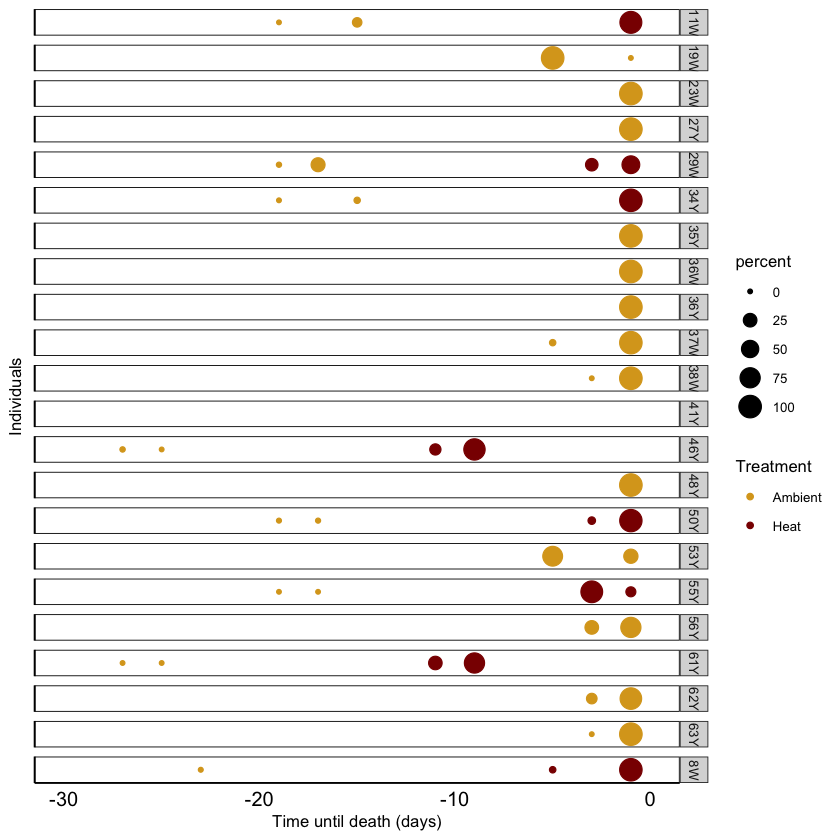

In [56]:
#plot mackin score vs number released
ggplot(dead, aes(x = -time_death, y=dummy, size = percent, col=Treatment, group=ID)) +
scale_color_manual(values=c("goldenrod", "darkred"))+
      geom_point()+
#geom_line()+
 facet_grid( ID ~ .)+
theme_bw()+
theme(legend.position="right", 
      panel.border = element_rect(color="black"), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
        axis.text.y=element_blank(),
          axis.ticks=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=12),
          text = element_text(size=10))+
xlim(-30,0)+
ylab("Individuals")+
xlab("Time until death (days)")

In [151]:
head(all)

ID,Treatment,Day,number,Salinity,TISSUE,MORTALITY.DATE,Gape,Mortality,Gape_day,Mortality_day,Four_trials,Survived,Trial
10W,Ambient,5,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,one
10W,Ambient,7,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,two
10W,Ambient,10,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,one
10W,Ambient,14,NA,LOW,0.5,,NA,NA,NA,NA,No,Yes,two
10W,Heat,21,27,LOW,0.5,,NA,NA,NA,NA,No,Yes,one
10W,Heat,23,0,LOW,0.5,,NA,NA,NA,NA,No,Yes,two


In [67]:
maxcells=aggregate(number~ID, data=all, FUN=max)

In [68]:
colnames(maxcells)=c("ID", "number")

In [69]:
maxfull=merge(maxcells, all, by=c("ID", "number"))

In [70]:
head(maxfull)

ID,number,Treatment,Day,Salinity,TISSUE,MORTALITY.DATE,Gape,Mortality,Gape_day,Mortality_day,Four_trials,Survived,Tissue_sim,Trial
10W,27,Heat,21,LOW,0.5,,NA,NA,NA,NA,No,Yes,1,one
11W,13,Heat,28,LOW,1.0,7-Nov,7-Nov,8-Nov,28,29,No,No,1,one
12W,302,Heat,21,LOW,1.0,,NA,NA,NA,NA,No,Yes,1,one
13W,17,Heat,32,LOW,0.5,,NA,NA,NA,NA,Yes,Yes,1,two
14W,67,Heat,28,LOW,2.0,,NA,NA,NA,NA,No,Yes,2,one
15W,1809,Heat,23,LOW,4.0,,NA,NA,NA,NA,No,Yes,4,two


In [76]:
maxfull$Day=as.numeric(as.character(maxfull$Day))
maxfull$Deathday=maxfull$Mortality_day-maxfull$Day

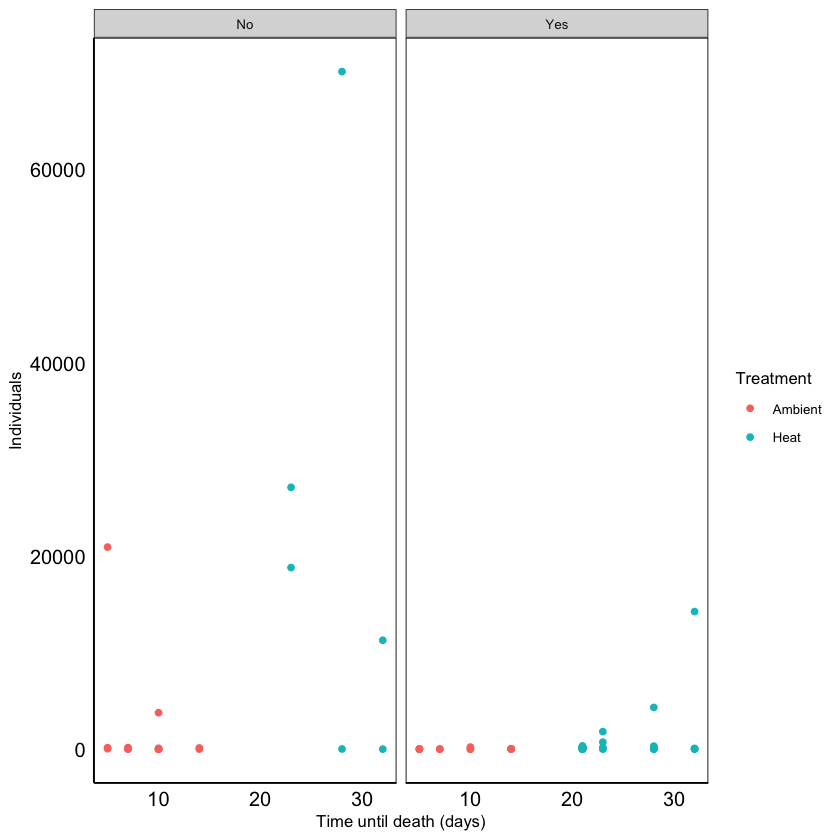

In [84]:
#plot mackin score vs number released
ggplot(maxfull, aes(x = Day, y=number, col=Treatment, group=ID)) +
#scale_color_manual(values=c("goldenrod", "darkred"))+
      geom_point()+
#geom_line()+
 facet_grid( . ~ Survived)+
theme_bw()+
theme(legend.position="right", 
      panel.border = element_rect(color="black"), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
        #axis.text.y=element_blank(),
          axis.ticks=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=12),
          text = element_text(size=10))+
ylab("Individuals")+
xlab("Time until death (days)")

In [72]:
table(maxfull$Treatment, maxfull$Survived)

         
          No Yes
  Ambient 15  14
  Heat     6  41

In [75]:
maxfull[maxfull$Survived=="No",]

,ID,number,Treatment,Day,Salinity,TISSUE,MORTALITY.DATE,Gape,Mortality,Gape_day,Mortality_day,Four_trials,Survived,Tissue_sim,Trial
2,11W,13,Heat,28,LOW,1,7-Nov,7-Nov,8-Nov,28,29,No,No,1,one
9,19W,1,Ambient,10,LOW,NA,20-Oct,NA,25-Oct,NA,15,No,No,NA,one
13,23W,20925,Ambient,5,LOW,NA,17-Oct,NA,16-Oct,NA,6,No,No,NA,one
17,27Y,3771,Ambient,10,HIGH,NA,20-Oct,NA,21-Oct,NA,11,No,No,NA,one
20,29W,27117,Heat,23,LOW,5,2-Nov,2-Nov,3-Nov,23,24,Yes,No,4,two
21,29Y,0,Ambient,10,HIGH,NA,11-Nov,NA,12-Nov,NA,NA,No,No,NA,one
22,29Y,0,Heat,32,HIGH,NA,11-Nov,NA,12-Nov,NA,NA,No,No,NA,two
30,34Y,70173,Heat,28,HIGH,4,7-Nov,7-Nov,8-Nov,28,29,No,No,4,one
32,35Y,87,Ambient,10,HIGH,NA,24-Oct,NA,21-Oct,NA,11,No,No,NA,one
33,36W,146,Ambient,5,LOW,NA,17-Oct,NA,16-Oct,NA,6,No,No,NA,one


Warning message:
“Removed 2 rows containing missing values (geom_point).”

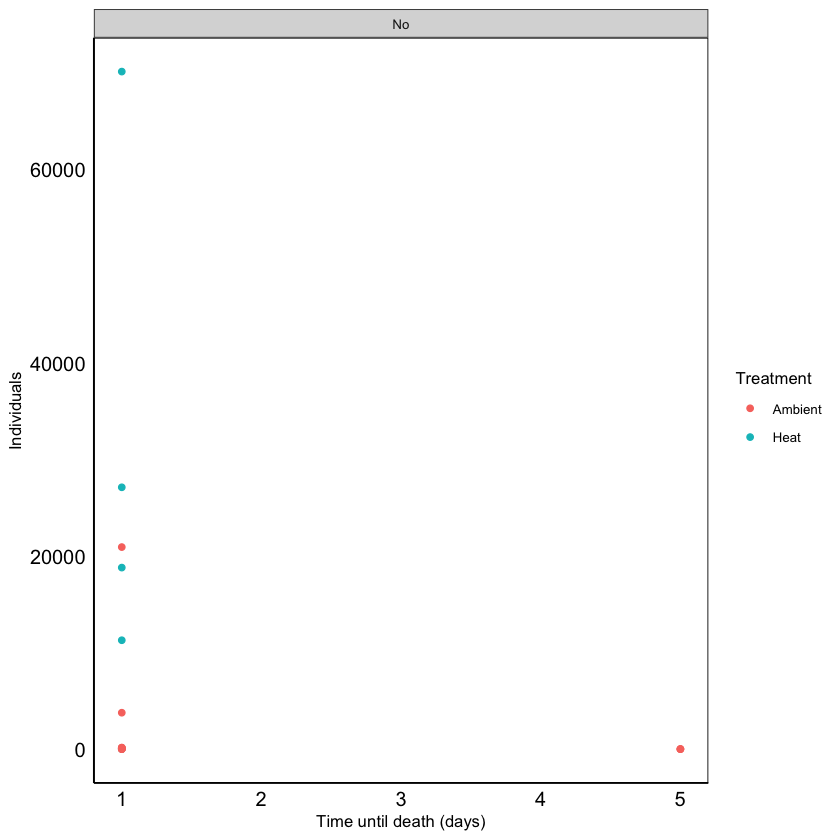

In [93]:
#plot mackin score vs number released
ggplot(maxfull[maxfull$Survived=="No",], aes(x = Deathday, y=number, col=Treatment, group=ID)) +
#scale_color_manual(values=c("goldenrod", "darkred"))+
geom_point()+
 facet_grid( . ~ Survived)+
theme_bw()+
theme(legend.position="right", 
      panel.border = element_rect(color="black"), 
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
        #axis.text.y=element_blank(),
          axis.ticks=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black", size=12),
          text = element_text(size=10))+
ylab("Individuals")+
xlab("Time until death (days)")

Set up so that you can more clearly see individuals--heatmap? each row is an individual size of dot= amount of cells released

Compare living and dead. frequency? boxplot? 
Cumulative total of cells released for an individual oyster. total for respective treatments. 


MAximum number of cells released?
if died had to have measurment within x number of days of death. 
is maximum higher for those that died than those that survived? 



Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

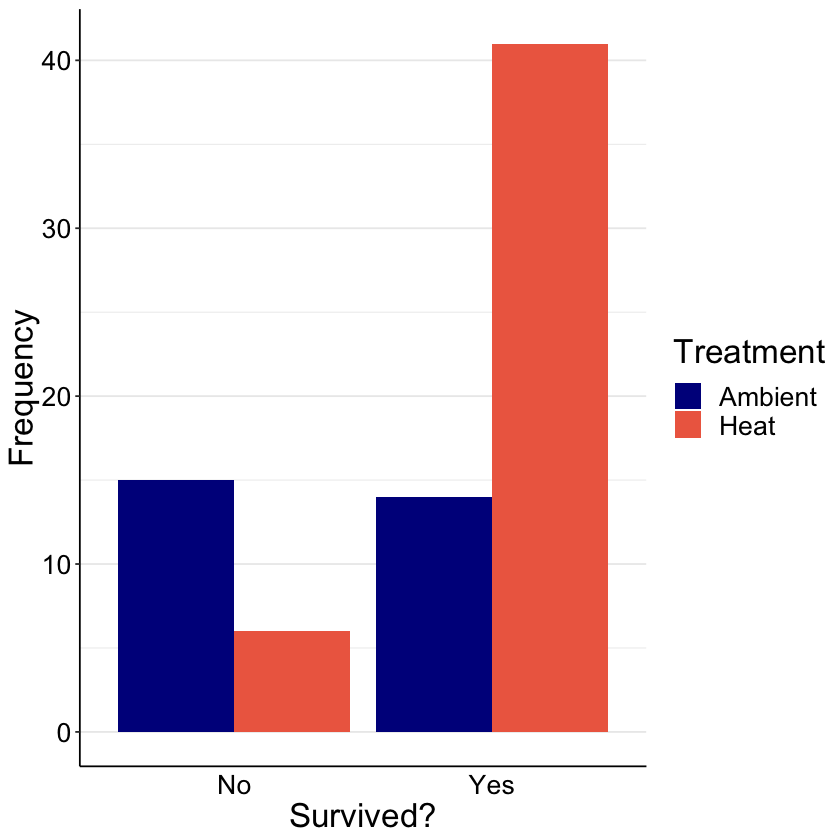

In [102]:
#plot a histogram
ggplot(maxfull, aes(x=Survived, fill=Treatment)) +
  geom_histogram(position="dodge", stat="count")+
scale_fill_manual(values=c("darkblue", "coral2"))+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("Frequency")+xlab("Survived?")

For survivors, the maximum release usually occured during a heated treatment. For non-survivors, the maximum was slightly more likely to occur during an ambient treatment. How do I do these stats??


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”Warning message:
“Removed 2 rows containing non-finite values (stat_count).”

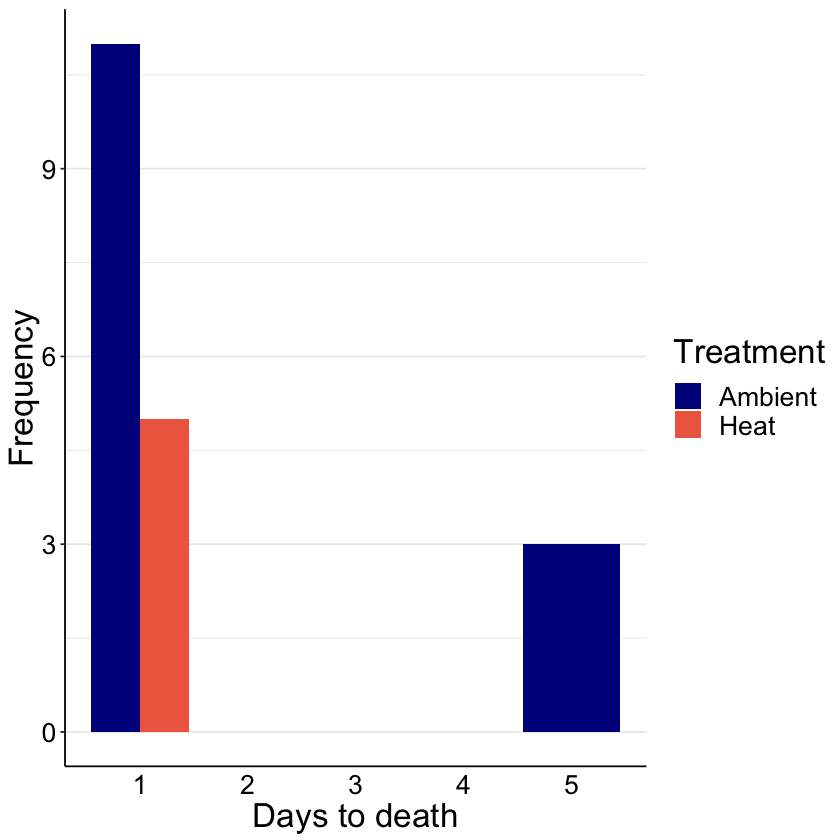

In [100]:
#plot a histogram
ggplot(maxfull[maxfull$Survived=="No",], aes(x=Deathday, fill=Treatment)) +
  geom_histogram(position="dodge", stat="count")+
scale_fill_manual(values=c("darkblue", "coral2"))+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
    
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("Frequency")+xlab("Days to death")

15/18 of the non-survivors released their maximum number of cells 1 day before dying

Warning message:
“Removed 7 rows containing non-finite values (stat_boxplot).”

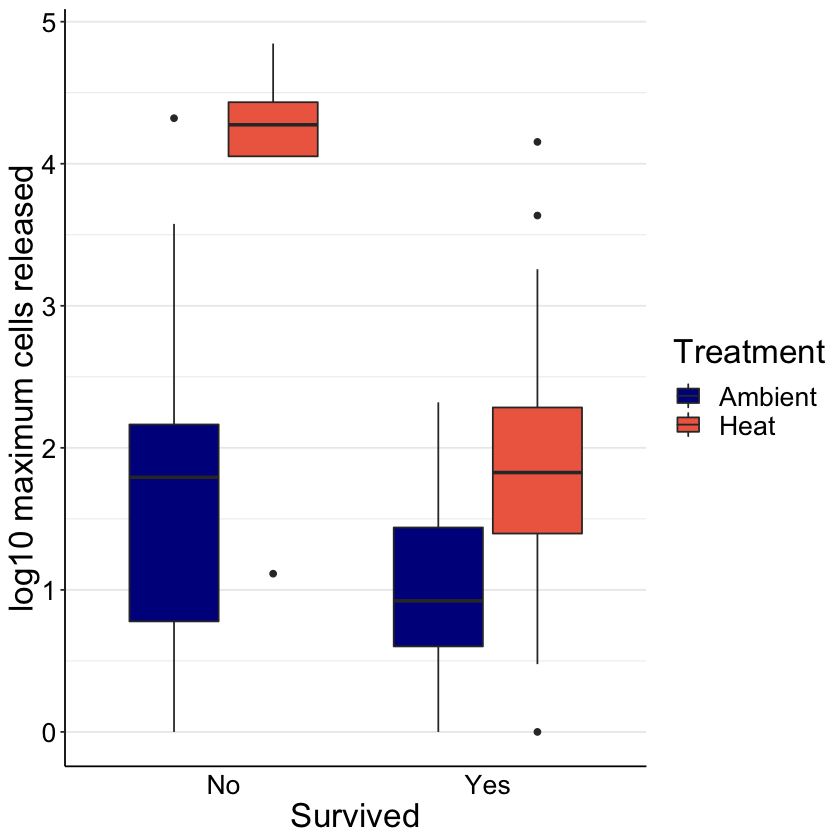

In [91]:
#plot a boxplot
ggplot(maxfull, aes(x = Survived, y = log10(number), fill=Treatment)) +
scale_fill_manual(values=c("darkblue", "coral2"))+
        geom_boxplot()+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("log10 maximum cells released")

Heated non-survivors had the highest maximum number of cells released, but some heated survivors had maxima within this range. Heated survivors had similar maxima to ambient survivors and non-survivors. 

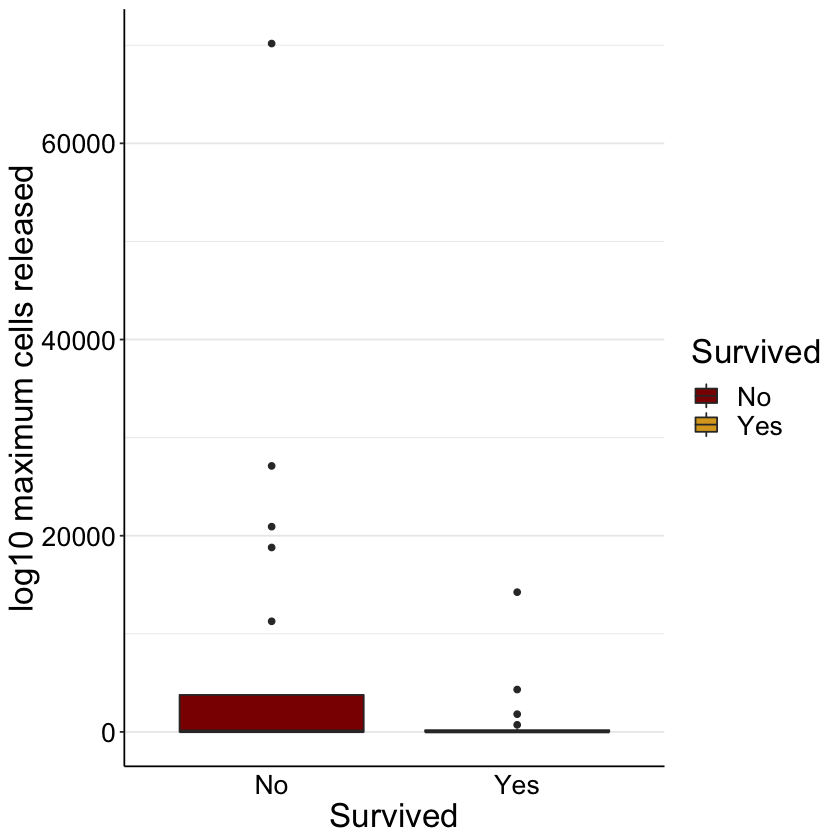

In [89]:
#plot a boxplot
ggplot(maxfull, aes(x = Survived, y = (number), fill=Survived)) +
scale_fill_manual(values=c("darkred", "goldenrod"))+
        geom_boxplot()+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=20))+
ylab("log10 maximum cells released")